# Privacy Project 
### Tue Jan 25
### Giorgi Alavidze
#### Method illustration -- the following jupyter notebook demonstrates the techniques used for identifying individuals from the stopcov lotto dataset

In [1]:
import requests
import json
import pandas as pd
import itertools
import pandasql
from IPython.display import Image
import os
import matplotlib

In [19]:
def open_csv():
    '''
    The CSV file is attached on github
    '''
    df = pd.read_csv('lottoproject.csv')
    df = df.drop(df.columns[0],axis=1) #get rid of unwanted columns
    return df

In [20]:
def get_records_resource(pid):
    '''
    get a set of records for 1 day 
    resource - [1,2] -> 1 -- general winners, 2 -- weekly winners
    '''
    base_url = 'https://stopcov-api.lotto.ge/Public/Winnings'
    url = base_url + '/' + pid 
    response = requests.get(url)
    response_json = response.json()
    return response_json

In [21]:
def identify_010_849():
    '''
    sends get requests to the search bar to see if a given personal ID has won.
    '''
    for i in range (99999+1):
        h = '010' + '{0:05}'.format(i) + '849'
        print(h,get_records_resource(h))

In [2]:
def find_010_849():
    '''
    returns all of the rows from the dataset with personal ID 010 - 849
    '''
    hp = open_csv()
    ret_ = hp.query('personalId == "010-----849"')
    return ret_

# OBTAINING THE DATASET (Webscraping)
### There are two available tables on the website. Each time user selects a date, a get request is sent to the following: 
### https://stopcov-api.lotto.ge/Public/Winners/x (.../Winners/2/x for second table.) 
### where x is time in UNIX timestamp (4PM GMT time in Georgia Standart Time, GMT + 0400). The following get request returns the winners for that day in json format.
### P.S. As the lottery has come to the end, we don't include the techniques used for obtaining the dataset, instead it can be found in the github repository.

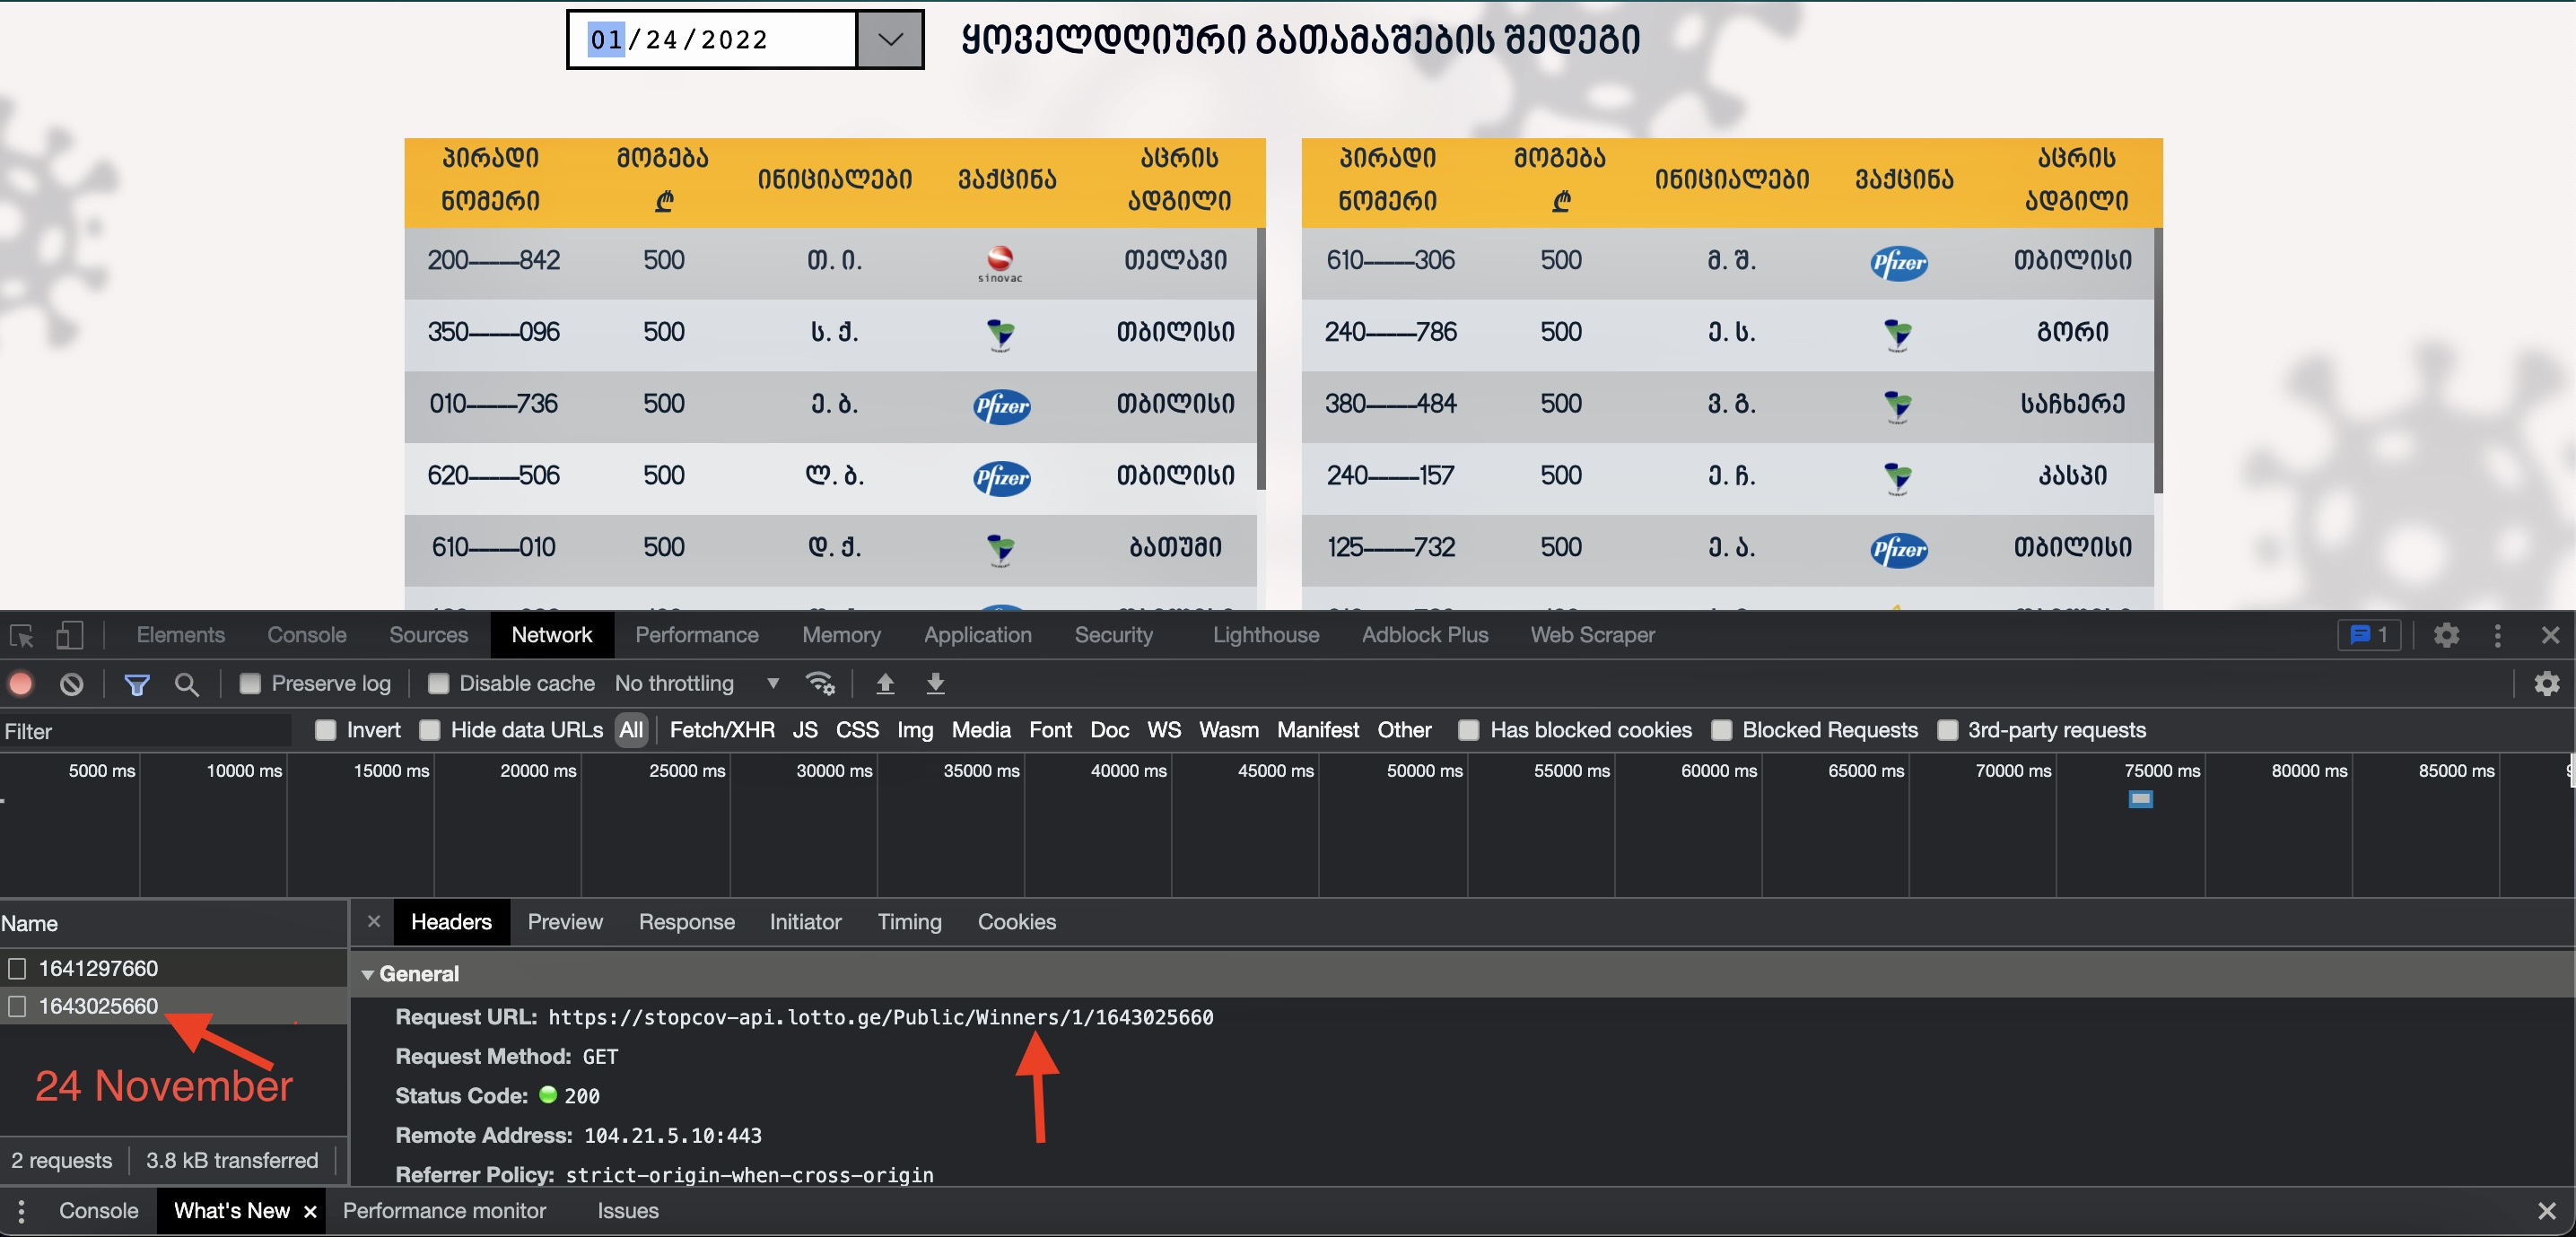

## Search bar
### Similarly, when we type in a Personal ID in the search bar, we get a get request to the following url: 
### 'https://stopcov-api.lotto.ge/Public/Winnings/x' (where x is the personal id)
### The following get request either returns true or false, indicating whether the person with the given id has won a prize or not.

### Individiual identification
### I used the following method to see whether individuals could be identified. Firstly, I used the web scraping technique discussed in the notebook and created the dataframe. I found out that the most common occurences of the first and last three digits are 010-----849. Secondly, I iteratively sent a get request to the search bar by filling out the empty cells from 1 to 99999. 

<div>
<img src="attachment:Identification.png" width="500"/>
</div>

### Using the https://www.companyinfo.ge website, I found out that the personal id is identified with ელგუჯა ჯანელიძე, or ე.ჯ. (row 11740)

In [30]:
find_010_849()

,personalId,wonAmount,initials,vaccineName,vaccinationPlace
6112,010-----849,100,ბ. ნ.,Pfizer,თბილისი
8480,010-----849,500,რ. ხ.,Pfizer,თბილისი
9043,010-----849,100,მ. ტ.,Sinopharm,თბილისი
9152,010-----849,100,მ. უ.,Sinopharm,თბილისი
11060,010-----849,100,ნ. მ.,Pfizer,თბილისი
11740,010-----849,100,ე. ჯ.,Sinopharm,თბილისი
17503,010-----849,5000,ა. მ.,Sinopharm,თბილისი


## Lastly, with the combination of their last name and personal ID, we can track their address using the following website: https://voters.cec.gov.ge/
## Where we input the personal id in the first column, and last name in the second one.